<center> <img src="https://d3i71xaburhd42.cloudfront.net/261c3e30bae8b8bdc83541ffa9331b52fcf015e6/3-Figure2-1.png" width=20% > </center>

# <center> Assignment 1: Photometric Stereo & Colour </center>
<center> Computer Vision 1 University of Amsterdam </center>
<center> Due 23:59PM, September 16, 2023 (Amsterdam time) </center>
<center> <b>TA's: Ozzy Ülger, Egoitz Gonzalez, Sina Taslimi</b></center>
    
***

Student1 ID: \
Student1 Name:

Student2 ID: \
Student2 Name:

Student3 ID: \
Student3 Name:

( Student4 ID: \
Student4 Name: )


# General guidelines


Your code and discussion must be handed in this jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Lab 1 Assignment. Please also fill out your names and ID's above.

For full credit, make sure your notebook follows these guidelines:
- It is mandatory to use the Python environment provided with the assignment; the environment specifies the package versions that have to be used to prevent the use of particular functions. Using different packages versions may lead to grade deduction. In the 'Environment Setup' below you can check whether your environment is set up correctly.
- To install the environment with the right package versions, use the following command in your terminal: ```python
conda env create --file=environment.yaml```, then activate the environment using the command ```python conda activate cv1```.
- Please express your thoughts concisely. The number of words does not necessarily correlate with how well you understand the concepts.
- Answer all given questions and sub-questions.
- Try to understand the problem as much as you can. When answering a question, give evidences (qualitative and/or quantitative results, references to papers, figures etc.) to support your arguments. Note that not everything might be explicitly asked for and you are expected to think about what might strengthen you arguments and make the notebook self-contained and complete.
- Tables and figures must be accompanied by a brief description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.

__Note:__ A more complete overview of the lab requirements can be found in the Course Manual on Canvas

Late submissions are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.
Plagiarism note: Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations. This includes the use of generative tools such as ChatGPT.

**ENSURE THAT YOU SAVE ALL RESULTS / ANSWERS ON THE QUESTIONS (EVEN IF YOU RE-USE SOME CODE).**

# 0 Environment Setup

In [1]:
# environment and libraries
import os
import glob
import numpy as np
import random
import cv2
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D   # necessary in part 4.

In [3]:
# Make sure you're using the provided environment!
assert cv2.__version__ == "3.4.8", "You're not using the provided Python environment!"
assert np.__version__ == "1.19.5", "You're not using the provided Python environment!"
assert matplotlib.__version__ == "3.3.4", "You're not using the provided Python environment!"
# Proceed to the next cell if you don't get any error.

# 1 Colour Spaces *(13 pts)*

In this part of the assignment, you will study the different colour spaces for image representations and experiment how to convert a given RGB image to a specific colour space

### 1.1 RGB Colour Model (2 pts)

Why do we use a RGB colour model as the basis of our digital cameras and photography? How does a standard digital camera capture the full RGB colour image?


*Write your answer here*


### 1.2 Colour Space Conversion *(8 pts)*




Create a function to convert an RGB image into the following colour spaces by using the template code you are provided ConvertColourSpace() below and other sub-functions. Visualize the new image and its channels separately in the same figure. That is, for example, in the case of HSV colour space, you need to visualize the converted HSV image, and its Hue, Saturation and Value channels separately (4 images, 1 figure).

__Grayscale__

Convert the RGB image into grayscale by using 3 different methods mentioned in
https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/
In addition, check and report which method OpenCV uses for grayscale conversion, include it as well, and visualize all 4 in the same figure.

__Opponent Colour Space__

$\begin{pmatrix}
O_1 \\
O_2 \\
O_3
\end{pmatrix}$ = $\begin{pmatrix}
\frac{R-G}{\sqrt{2}} \\
\frac{R+G-2B}{\sqrt{6}} \\
\frac{R+G+B}{\sqrt{3}}
\end{pmatrix}$

__Normalized RGB (rgb) Colour Space__

$\begin{pmatrix}
r \\
g \\
b
\end{pmatrix}$ = $\begin{pmatrix}
\frac{R}{R+G+B} \\
\frac{G}{R+G+B} \\
\frac{B}{R+G+B}
\end{pmatrix}$

__HSV Colour Space__

Convert the RGB image into HSV Colour Space. Use OpenCV’s built-in function *cv2.cvtColor(img, cv2.RGB2HSV)*.

__YCbCr Colour Space__

Convert the RGB image into YCbCr Colour Space. Use OpenCV’s built-in function *cv2.cvtColor(img, cv2.RGB2YCrCb)*. Note, you need to arrange the channels in $Y, C_b$ and $C_r$ order.

__HINT 1__

Ensure you understand the datatypes and ranges that the python conversion and image displaying functions require. This usually is [0, 1] for float datatype or [0, 255] for integer datatype. You may have to explicitely change the datatype.

__HINT 2__

Think about how to visualise for instance H, S, V channels. Do this in a manner that is meaningfull, e.g. visualize each of the H, S, V channels in a RGB manner.  

In [187]:
def rgb2grays(input_image, method='opencv'):
    # converts an RGB into grayscale by using 4 different methods
    R = input_image[:, :, 0]
    G = input_image[:, :, 1]
    B = input_image[:, :, 2]

    # lightness method: (max(R, G, B) + min(R, G, B)) / 2
    if method == 'lightness':
        maximum =  np.maximum(R, np.maximum(G,B))
        maximum =  np.minimum(R, np.minimum(G,B))
        new_image = (maximum + maximum) / 2

    # average method: (R + G + B) / 3
    if method == 'average':
        new_image = (R + G + B) / 3

    # luminosity method: 0.21 R + 0.72 G + 0.07 B
    if method == 'luminosity':
        new_image = 0.21 * R + 0.72 * G + 0.07 * B

    # built-in opencv function
    if method == 'opencv':
        new_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

    return new_image


def rgb2opponent(input_image):
    # converts an RGB image into opponent colour space
    # YOUR CODE HERE

    return new_image

def rgb2normedrgb(input_image):
    # converts an RGB image into normalized RGB colour space
    # YOUR CODE HERE

    return new_image


In [191]:
def visualize(input_image, new_image, colourpace='rgb'):
    '''
     Visualize the new image and its channels separately in the same figure.
     That is, for example, in the case of HSV colour space, you need to
     visualize the converted HSV image, and its Hue, Saturation and Value
     channels separately (4 images, 1 figure).
    '''

    # YOUR CODE HERE

    # number of channels 
    num_ch = input_image.shape[2]

    # Display new_image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, num_ch + 1, 1)  # (row,col, display_im row=1 col=1)
    plt.imshow(new_image)
    plt.title(f'{colourpace.upper()} Color Space')

    # Display all channels from new_image
    for i in range(num_ch):
        plt.subplot(1, num_ch + 1, i + 2)
        plt.imshow(new_image[:, :, i], cmap='gray')
        plt.title(f'Channel {i + 1}')

    plt.tight_layout()
    plt.show()


In [192]:
def ConvertColourSpace(input_image, colourspace):
    '''
    Converts an RGB image into a specified color space, visualizes the
    color channels and returns the image in its new color space.

    Colorspace options:
      opponent
      rgb -> for normalized RGB
      hsv
      ycbcr
      gray

    P.S: Do not forget the visualization part!
    '''

    # Convert the image into double precision for conversions
    input_image = input_image.astype(np.float32)

    if colourspace.lower() == 'opponent':
        # fill in the rgb2opponent function
        new_image = rgb2opponent(input_image)

    elif colourspace.lower() == 'rgb':
        # fill in the rgb2normedrgb function
        new_image = rgb2normedrgb(input_image)

    elif colourspace.lower() == 'hsv':
        # use built-in function from opencv
        new_image = cv2.cvtColor(input_image.astype(np.uint8), cv2.COLOR_BGR2HSV)

    elif colourspace.lower() == 'ycbcr':
        # use built-in function from opencv
        new_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2YCR_CB)
        
    elif colourspace.lower() == 'gray':
        # fill in the rgb2grays function
        new_image = rgb2grays(input_image)

    else:
        print('Error: Unknown colorspace type [%s]...' % colourspace)
        new_image = input_image

    return new_image


uint8


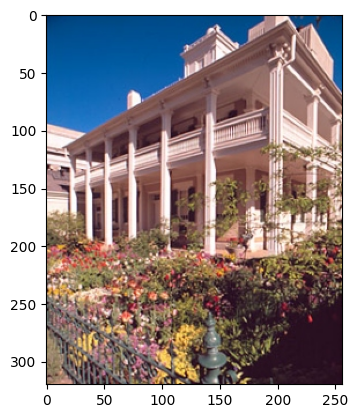

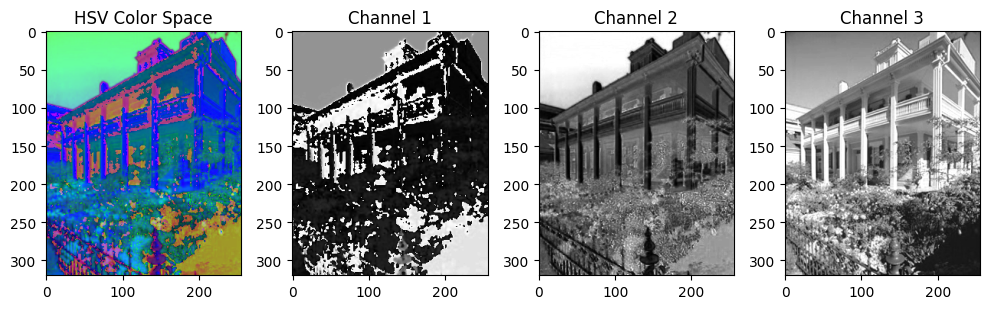

In [193]:
input_image = cv2.imread('./images/awb/awb.jpg')
print(input_image.dtype)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(input_image_rgb)

new_image = ConvertColourSpace(input_image, 'hsv')

visualize(input_image, new_image, 'hsv')

### 1.3 Colour Space Properties (2 pts)

Explain each of the above 5 colour spaces and their properties. What are the benefits of using a different colour space other than RGB? Provide reasons for each of the above cases. You can include your observations from the visualizations.

*Write your answer here*

### 1.4 More on Colour Spaces (1 pt)

Find one more colour space from the literature, briefly explain its properties and give a use case.

*Write your answer here*

# 2 Colour Constancy *(15 pts)*

Colour constancy is the ability to perceive colors of objects, invariant to the colour of the light source. The aim for colour constancy algorithms is first to estimate the illuminant of the light source, and then correct the image so that the corrected image appears to be taken under a canonical (white) light source. The task of the automatic white balance (AWB) is to do the same in digital cameras so that the images taken by a digital camera look as natural as possible.

In this part of the assignment, you will implement the most famous colour constancy algorithm; *Grey-World Algorithm*. The algorithm assumes that, under a white light source, the average colour in a scene should be achromatic (grey, [128, 128, 128]).

Specific information on the algorithm can be found on:
https://en.wikipedia.org/wiki/Color_normalization#Grey_world



### 2.1 Grey-World algorithm (8 pts)

Complete the function to apply colour correction to an RGB image by using Grey-World algorithm. Display the original image and the colour corrected one on the same figure. Use awb.jpg image (provided in the downloaded zip-file) to test your algorithm. In the end, you should see that the reddish colour cast on the image is removed and it looks more natural.

  ***Note:*** You do not need to apply any pre or post processing steps. For the calculation or processing, you are not allowed to use any available code or any dedicated library function except *standard Numpy functions*.
   

In [ ]:
def grey_world(awb_img):

    # YOUR CODE HERE

    return colorCorrectedImg

### 2.2 Limits of Grey-World (2 pts)

Give an example case for Grey-World Algorithm on where it might fail. Include your reasoning.


*Write your answer here*

### 2.3 Other Constancy algorithms (5 pts)

Find out one more colour constancy algorithm from the literature and explain it briefly.


*Write your answer here*

# 3 Intrinsic Image Decomposition *(12 pts)*


Intrinsic image decomposition is the process of separating an image into its formation components, such as reflectance (albedo) and shading (illumination). <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) Then, under the assumptions of body (diffuse) reflection, linear sensor response and narrow band filters, the decomposition of the observed image $I(\vec{x})$ at position $\vec{x}$ can be approximated as the element-wise product of its albedo $R(\vec{x})$ and shading $S(\vec{x})$ intrinsics:

$$I(\vec{x})=R(\vec{x}) \times S(\vec{x})$$

In this part of the assignment, you will experiment with intrinsic image components to perform a particular computational photography applications: material recolouring. For the experiments, we will use images from a synthetic intrinsic image dataset. <a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2)

<a name="cite_note-1"></a><small>1. [^](#cite_ref-1) H. G. Barrow and J. M. Tenenbaum. Recovering intrinsic scene characteristics from images. Computer Vision Systems, pages 3-26, 1978.</small>

<a name="cite_note-2"></a><small>2. [^](#cite_ref-1) http://www.cic.uab.cat/Datasets/synthetic_intrinsic_image_dataset/



### 3.1 Image decomposition *(2 pts)*

In what other components can an image be decomposed other than albedo and shading? Give an example and explain the concepts in your answer.

In scene understanding, the observed image can be decomposed into its intrinsic images by separating them into a shading, depth, reflectance, and
illuminant color component. 

Using a depth approach [1], encoding the distance from the camera to the scene can be used for image decomposition. In [2] a depth prediction network is used to create an intrinsic image of the scene.

1: Chen, Q., & Koltun, V. (2013). A simple model for intrinsic image decomposition with depth cues. In Proceedings of the IEEE international conference on computer vision (pp. 241-248).

2: Kim, S., Park, K., Sohn, K., & Lin, S. (2016). Unified depth prediction and intrinsic image decomposition from a single image via joint convolutional neural fields. In Computer Vision–ECCV 2016: 14th European Conference, Amsterdam, The Netherlands, October 11-14, 2016, Proceedings, Part VIII 14 (pp. 143-159). Springer International Publishing.

### 3.2 Synthetic data *(2 pts)*

If you check the literature, you will see that almost all intrinsic image decomposition datasets are composed of synthetic images. What might be the reason for that?

The use of synthetic images allow us to compute and test programs for scientific purposes. Real images usually come with noise and undesirable properties that unable generalization. Synthetic images, on the other hand, allow us to have a ground truth as they are not corrupted by lightning effects from its surroundings.

### 3.3. Reconstructing *(4 pts)*

Pick a favorite object from the synthetic intrinsic image dataset and store it's original image, shading and reflectance in a new folder in *'./images'*, e.g. *./images/intrinsic_images/* (or choose your own folder and change the path in the code). Show that you can actually reconstruct the original PNG image from its intrinsics using the albedo and shading. In the end, your script should output a figure displaying the original image, its intrinsic images and the reconstructed one. Complete the code for function **iid_image_formation()**.

The auxiliary functions are for opening and visualizing the original and intrinsic images. In your submission, only supply the images of the object you picked.

In [56]:
def iid_image_formation(albedo_img, shading_img):
    idd_img = np.multiply(albedo_img/255, shading_img/255)

    return idd_img

ball: (266, 480, 3) uint8
objectShading: (266, 480, 3) uint8
objectAlbedo: (266, 480, 3) uint8


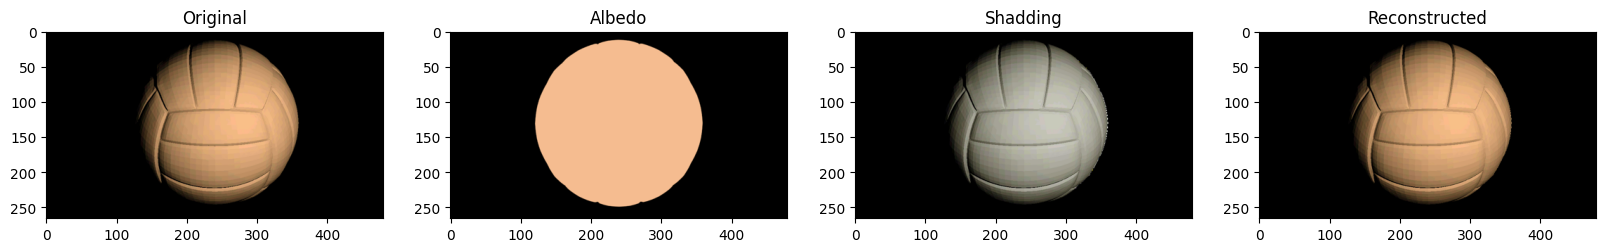

In [275]:
## Replace the image name with a valid image
img_path = './images/intrinsic_images/'
object_name = 'ball'

## Read with opencv
picked_object = cv2.imread(img_path + object_name + '.png')
if picked_object is None:
    print('no image found')
else:
    print(object_name + ':', picked_object.shape, picked_object.dtype )

objectShading = cv2.imread(img_path + object_name + '_shad.png')
if objectShading is None:
    print('no image found')
else:
    print('objectShading:', objectShading.shape, objectShading.dtype)

objectAlbedo = cv2.imread(img_path + object_name + '_refl.png')
if objectAlbedo is None:
    print('no image found')
else:
    print('objectAlbedo:', objectAlbedo.shape, objectAlbedo.dtype)

picked_object_IDD = iid_image_formation(objectAlbedo, objectShading)

# Transform color space
picked_object_IDD = (picked_object_IDD/picked_object_IDD.max()*255.).astype(np.uint8)
picked_object_IDD_rgb = cv2.cvtColor(picked_object_IDD, cv2.COLOR_BGR2RGB)

picked_object = (picked_object/picked_object.max()*255.).astype(np.uint8)
picked_object_rgb = cv2.cvtColor(picked_object, cv2.COLOR_BGR2RGB)

objectAlbedo = (objectAlbedo/objectAlbedo.max()*255.).astype(np.uint8)
objectAlbedo_rgb = cv2.cvtColor(objectAlbedo, cv2.COLOR_BGR2RGB)

objectShading = (objectShading/objectShading.max()*255.).astype(np.uint8)
objectShading_rgb = cv2.cvtColor(objectShading, cv2.COLOR_BGR2RGB)


# Visualize
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(picked_object_rgb)

plt.subplot(1, 4, 2)
plt.title('Albedo')
plt.imshow(objectAlbedo_rgb)

plt.subplot(1, 4, 3)
plt.title('Shadding')
plt.imshow(objectShading_rgb)

plt.subplot(1, 4, 4)
plt.title('Reconstructed')
plt.imshow(picked_object_IDD_rgb)


### 3.4 Recoloring *(4 pts)*


Manipulating colours in photographs is an important problem with many applications in computer vision. Since the aim for recolouring algorithms is just to manipulate colours, better results can be obtained for such a task if the albedo image is available as it is independent of confounding illumination effects.

Assume that you are given the PNG image and you have access to its
intrinsic albedo and shading images.
1. Find out the true material colour of the object you picked in RGB space (which is uniform in this case).
2. Recolour the object's image with pure green (0, 255, 0). Display the original object image and the recoloured version on the same figure. Complete the code for function **recolouring()**.

3. Although you have recoloured the object with pure green, the reconstructed images do not seem to display those pure colors and thus the colour distributions over the object do not appear uniform. Explain the reason.

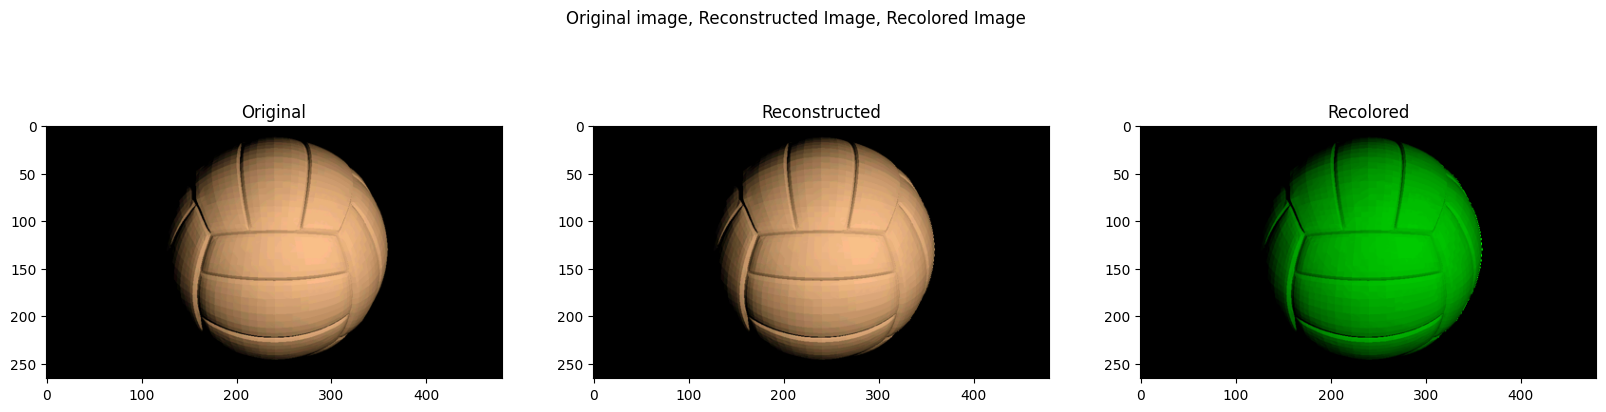

In [278]:
def recolouring(albedo_img, shading_img):
    albedo_green = albedo_img > 0
    albedo_green[:, :, 0] = 0
    albedo_green[:, :, 2] = 0
    green_img = albedo_green * shading_img
    recoloured_image = cv2.cvtColor(green_img, cv2.COLOR_BGR2RGB)

    return recoloured_image

def visualize_recolor(original, reconstruct, recolor):
    fig = plt.figure(figsize=(20, 5))

    ax1 = plt.subplot(1, 3, 1)
    ax1.imshow(original)
    ax1.set_title('Original')

    ax2 = plt.subplot(1, 3, 2)
    ax2.imshow(reconstruct)
    ax2.set_title('Reconstructed')

    ax3 = plt.subplot(1, 3, 3)
    ax3.imshow(recolor)
    ax3.set_title('Recolored')

    # Set the title for the main plot
    fig.suptitle('Original image, Reconstructed Image, Recolored Image')
    plt.show()

recolored_rgb = recolouring(objectAlbedo, objectShading)

visualize_recolor(picked_object_rgb, picked_object_IDD_rgb, recolored_rgb)


The green colors is not displayed as pure green because the reconstructed image has been influenced by the objectShading which means the pure green as suffered of color variations due to the different levels of shading.

__Note:__  this was a simple case where the image is synthetic, object centered and has only one colour, and you have access to its ground-truth intrinsic images. Real world scenarios require more than just replacing a single colour with another, not to mention the complexity of achieving a decent intrinsic image decomposition.

# 4 Photometric Stereo *(60 pts)*

In this part of the assignment, you are going to implement the photometric stereo algorithm as described in Section 5.4 (Forsyth and Ponce, *Computer Vision: A Modern Approach*). The chapter snippet has been included in the assignment zip file.

Following this instruction, you will edit and fill in your code in the procedures below **estimate_alb_nrm()**, **check_integrability()** and **construct_surface()**, that you can find in the codecells below (4.1, 4.2 and 4.3, respectively). The main script **photometric_stereo** (4.4) is provided for reference and should not be taken as is. Throughout the assignment, you will be asked to perform different trials and experiments which will require you to adjust the main code accordingly; this also shows how well you can cope with the materials.

Include images of the results into your notebook at informative points. For 3D models, make sure to choose a viewpoint that makes the structure as clear as possible and/or feel free to take them from multiple viewpoints.

### 4.1 Estimating Albedo and Surface Normal *(15 pts)*
Let us start with the grayscale sphere model, which is located in the SphereGray5 folder. The folder contains 5 images of a sphere with a grayscale checker texture under similar lighting conditions as the one in the book. Your task is to estimate the surface reflectance (albedo) and surface normal of this model. The light source directions are encoded in the image file names.

1. Complete the code for function **estimate_alb_nrm()** to estimate albedo and surface normal map for the SphereGray5 folder. What do you expect to see in albedo image and how is it different from your result?
2. In principle, what is the minimum number of images you need to estimate albedo and surface normal? Run the algorithm with more images by using SphereGray25, observe the differences in the results and report. You could try all images at once or a few at the time, in an incremental fashion. Choose a strategy and justify it by discussing your results.
3. What is the impact of shadows in photometric stereo? Explain the trick that is used in the text to deal with shadows. Remove that trick from your implementation and check your results. Is the trick necessary in the case of 5 images? how about 25 images?

An answer box can be found below the code cells.

**Hint**: To get the least-squares solution of a linear system, you can use **numpy.linalg.lstsq** function.

In [227]:
# Helper functions to load the synthetic images

def load_syn_images(image_dir='./images/photometrics_images/SphereGray5/', channel=0, num_im=5):
    files = os.listdir(image_dir)[:num_im]
    nfiles = len(files)

    image_stack = None
    V = 0
    Z = 0.5

    for i in range(nfiles):
        # f,axarr = plt.subplots(1,3)
        # read input image
        im = cv2.imread(os.path.join(image_dir, files[i]))   #img.shape 512x512x3
        # axarr[0].imshow(im)
        im = np.flip(im, axis=-1)
        # axarr[1].imshow(im)
        im = im[:,:,channel]
        # axarr[2].imshow(im,cmap='gray')
        
        

        # stack at third dimension
        if image_stack is None:
            print(f"img shape: {im.shape}")
            h, w = im.shape
            print('Image size (H*W): %d*%d' %(h,w) )
            image_stack = np.zeros([h, w, nfiles], dtype=int)
            # print(f"img_stack: {image_stack.shape}")
            
            V = np.zeros([nfiles, 3], dtype=np.float64)

        image_stack[:,:,i] = im  # i stands for all files

        # read light direction from image name
        X = np.double(files[i][(files[i].find('_')+1):files[i].rfind('_')])
        Y = np.double(files[i][files[i].rfind('_')+1:files[i].rfind('.png')])
        V[i, :] = [-X, Y, Z]

    # normalization
    image_stack = np.double(image_stack)
    min_val = np.min(image_stack)
    max_val = np.max(image_stack)
    image_stack = (image_stack - min_val) / (max_val - min_val) if max_val!=min_val else np.zeros(image_stack.shape)  # avoid fail when image_stack==0
    normV = np.tile(np.sqrt(np.sum(V ** 2, axis=1, keepdims=True)), (1, V.shape[1]))
    scriptV = V / normV

    return image_stack, scriptV

In [469]:
# Helper function for showing results.

def show_results(albedo=None, normals=None, height_map=None, SE=None, num_imgs=5, trick="ON", path_type=''):
    # Stride in the plot, you may want to adjust it to different images
    stride = 1

    if (albedo is not None) and (normals is None):
        # showing albedo map
        fig = plt.figure(figsize=(5, 5))
        # albedo_max = albedo.max()
        albedo_max = 1
        albedo = albedo / albedo_max
        plt.imshow(albedo, cmap="gray")
        plt.title(f"Albedo SphereGray{num_imgs} - Trick:{trick}")
        plt.show()

    if normals is not None:
      extra_col = 0
      figure = plt.figure(figsize=(15, 5))

      if albedo is not None:
        extra_col = 1
        albedo_max = 1
        albedo = albedo / albedo_max

        ax0 = figure.add_subplot(int(f'1{4}{1}'))
        ax0.set_title(f"Albedo SphereGray{num_imgs} - Trick:{trick}")
        ax0.imshow(albedo, cmap="gray")

      # showing normals as three separate channels
      ax1 = figure.add_subplot(int(f'1{3 + extra_col}{1+extra_col}'))
      ax1.set_title('Normal X-component')
      ax1.imshow(normals[..., 0])
      ax2 = figure.add_subplot(int(f'1{3 + extra_col}{2+extra_col}'))
      ax2.set_title('Normal Y-component')
      ax2.imshow(normals[..., 1])
      ax3 = figure.add_subplot(int(f'1{3 + extra_col}{3+extra_col}'))
      ax3.set_title('Normal Z-component')
      ax3.imshow(normals[..., 2])

      plt.tight_layout()
      plt.show()

    # meshgrid
    a, b = 512, 512
    if normals is not None:
       a = np.shape(normals)[0]
       b = np.shape(normals)[1]
    X, Y, _ = np.meshgrid(np.arange(0, a, stride),
                          np.arange(0, b, stride), np.arange(1))
    X = X[..., 0]
    Y = Y[..., 0]

    '''
    =============
    You could further inspect the shape of the objects and normal directions by using plt.quiver() function.
    =============
    '''

    if height_map is not None:
      if len(height_map) == 512:
        # plotting model geometry
        H = height_map[::stride, ::stride]
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.plot_surface(X, Y, H.T)
        ax.set_title(f'{path_type.capitalize()} Map')
        plt.show()

      else:
        fig = plt.figure(figsize=(15, 5))
        for i in range(len(height_map)):
          height_map_ind = height_map[i]
          H = height_map_ind[::stride, ::stride]

          ax = fig.add_subplot(int(f'13{1+i}'), projection='3d')
          ax.plot_surface(X, Y, H.T)
          ax.set_xlabel('$x$')
          ax.set_ylabel('$y$')
          ax.set_zlabel('$z$')
          ax.set_title(f'{path_type[i].capitalize()} Map')
        
        fig.suptitle(f"SphereGray_{num_imgs} - Trick:{trick}", fontsize=14)
        # plt.tight_layout()
        plt.subplots_adjust(top=0.95) 
        plt.show()
         
    if SE is not None:
      # plotting the SE
      H = SE[::stride,::stride]
      fig = plt.figure()
      ax = fig.gca(projection='3d')
      ax.plot_surface(X,Y, H.T)
      ax.set_title(f'SE Map')
      plt.show()

In [345]:
def estimate_alb_nrm(image_stack, scriptV, shadow_trick=True):
    '''
    Compute the gradient of the surface
    INPUT:
        - image_stack : the images of the desired surface stacked up on the 3rd dimension
        - scriptV : matrix V (in the algorithm) of source and camera information
        - shadow_trick: (true/false) whether or not to use shadow trick in solving linear equations
    OUTPUT:
        - albedo : the surface albedo
        - normal : the surface normal
    '''

    h, w, _ = image_stack.shape

    # create arrays for
    albedo = np.zeros([h, w])           # albedo (1 channel)
    normal = np.zeros([h, w, 3])        # normal (3 channels)

    # ================
    # YOUR CODE BELOW

    # for each point in the image array
    #     stack image values into a vector i
    #     construct the diagonal matrix scriptI
    #     solve scriptI * scriptV * g = scriptI * i to obtain g for this point
    #     albedo at this point is |g|
    #     normal at this point is g / |g|
    # ================

    # for each point in the image array
    for x in range(h):
        for y in range(w):

            # stack image values into a vector i
            i = image_stack[x, y, :]

            # construct the diagonal matrix scriptI
            scriptI = np.diag(i)

            # solve scriptI * scriptV * g = scriptI * i to obtain g for this point
            if shadow_trick == True:
                A = np.matmul(scriptI, scriptV)
                p = np.matmul(scriptI, i) 
            else:
                A = scriptV
                p = i

            g, _, _, _ = np.linalg.lstsq(A, p, rcond = None)


            # albedo at this point is |g|
            albedo[x, y] = np.linalg.norm(g)

            # normal at this point is g / |g|
            # Error by dividing 0/0 https://www.geeksforgeeks.org/how-to-fix-invalid-value-encountered-in-true_divide/
            # if albedo[x, y] > 0:
            normal[x, y, :] = g / albedo[x, y]
            

    return albedo, normal


#### Answers 

##### 1. Complete the code for function **estimate_alb_nrm()** to estimate albedo and surface normal map for the SphereGray5 folder. What do you expect to see in albedo image and how is it different from your result?

In [346]:
# load syn images
image_stack, scriptV = load_syn_images()

# estimate_alb_nrm
albedo_5, normal_5 = estimate_alb_nrm(image_stack, scriptV, True)
albedo_shadTrick_off_5, normal_shadTrick_off_5 = estimate_alb_nrm(image_stack, scriptV, False)


img shape: (512, 512)
Image size (H*W): 512*512


/var/folders/bz/yv6zpqcs0vgf1wt80wfp36t40000gn/T/ipykernel_33957/3892350084.py:57: RuntimeWarning: invalid value encountered in true_divide
  normal[x, y, :] = g / albedo[x, y]


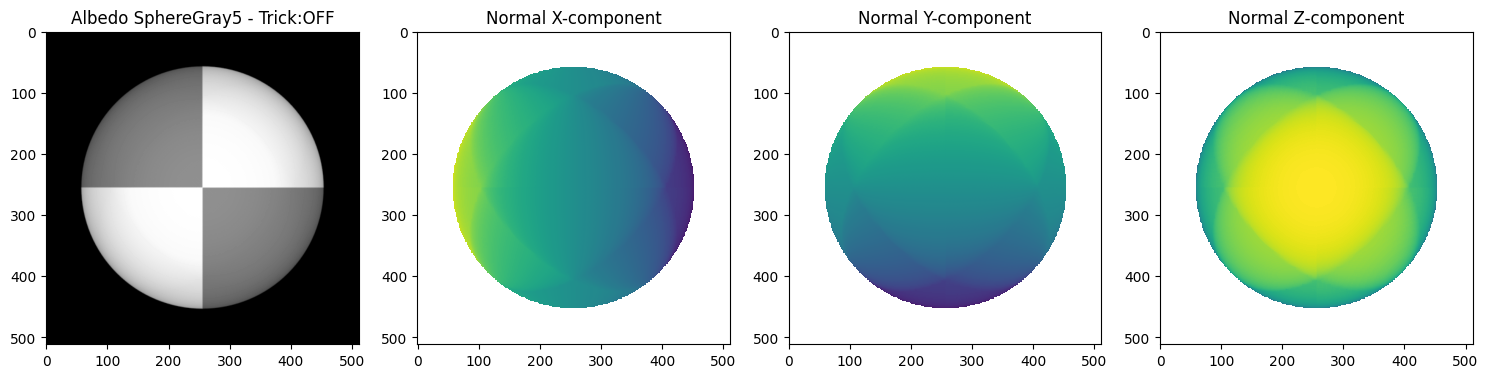

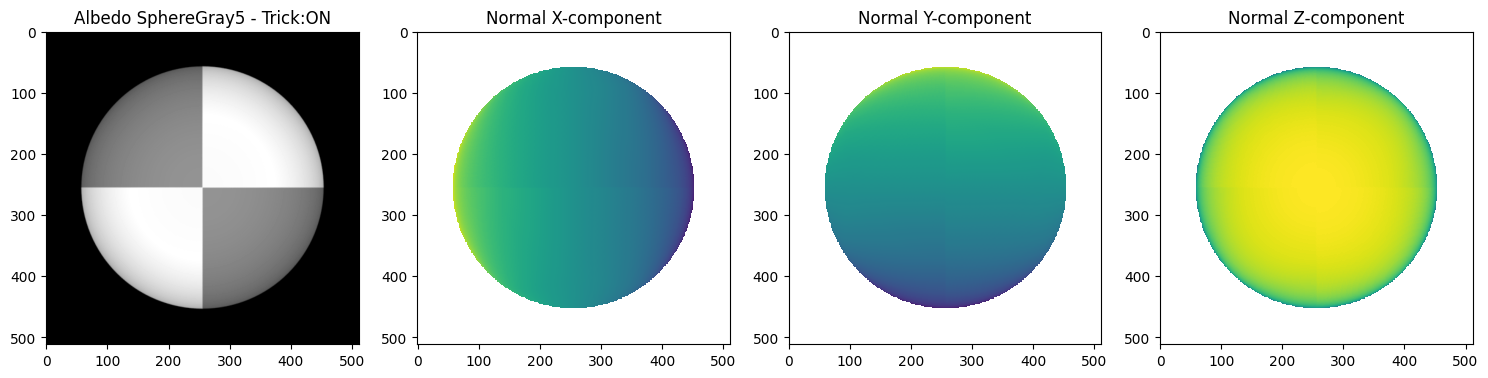

In [376]:
# Show results for SphereGray5
show_results(albedo_shadTrick_off_5, normal_shadTrick_off_5, trick="OFF")
show_results(albedo_5, normal_5, trick="ON")

The graphs above show the albedo and normals components calculated using the algorithm described in Section 5.4 (Forsyth and Ponce, *Computer Vision: A Modern Approach*). It is expected that the estimated albedo image should be uniform. As shown in both graphs we can see that this matches our assumption to some extent. The albedo shows slight shadows at the edge of the sphere which can be observed in the subplots of the normal components.   

##### 2. In principle, what is the minimum number of images you need to estimate albedo and surface normal? Run the algorithm with more images by using SphereGray25, observe the differences in the results and report. You could try all images at once or a few at the time, in an incremental fashion. Choose a strategy and justify it by discussing your results.

The minimum number of images necessary to estimate the albedo and the surface normal is 3. The estimated albedo and surface normal is expected to be more accurate if more than 3 light sources are used. 

The algorithm has been run in two setups:

1. All 25 images from SphereGray25 were used to calculate the albedo and normals. The results of this can be found below :


In [348]:
# load syn images
image_stack, scriptV = load_syn_images(image_dir='./images/photometrics_images/SphereGray25/', num_im=25)

# estimate_alb_nrm
albedo_25, normal_25 = estimate_alb_nrm(image_stack, scriptV, True)
albedo_shadTrick_off_25, normal_shadTrick_off_25 = estimate_alb_nrm(image_stack, scriptV, False)

img shape: (512, 512)
Image size (H*W): 512*512


/var/folders/bz/yv6zpqcs0vgf1wt80wfp36t40000gn/T/ipykernel_33957/3892350084.py:57: RuntimeWarning: invalid value encountered in true_divide
  normal[x, y, :] = g / albedo[x, y]


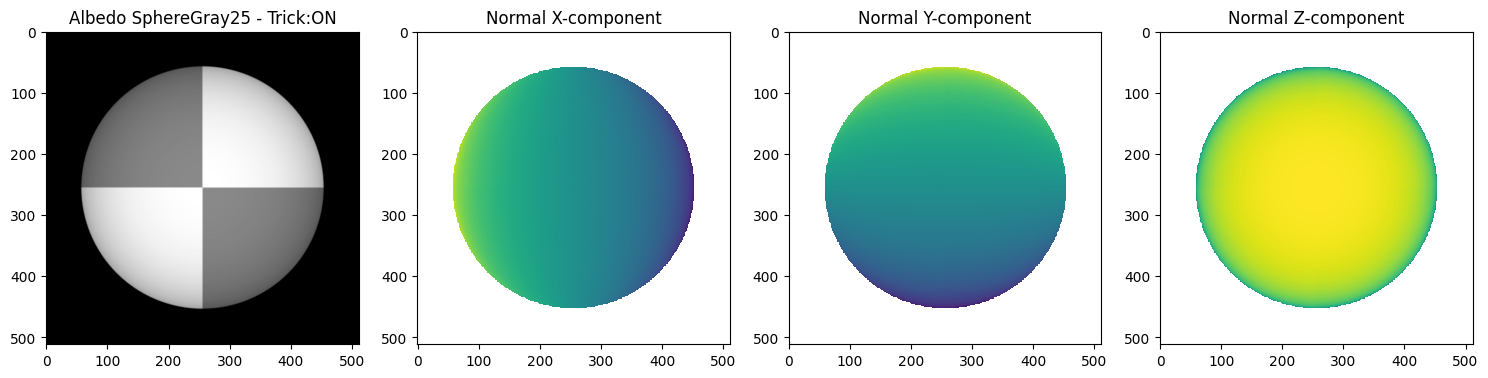

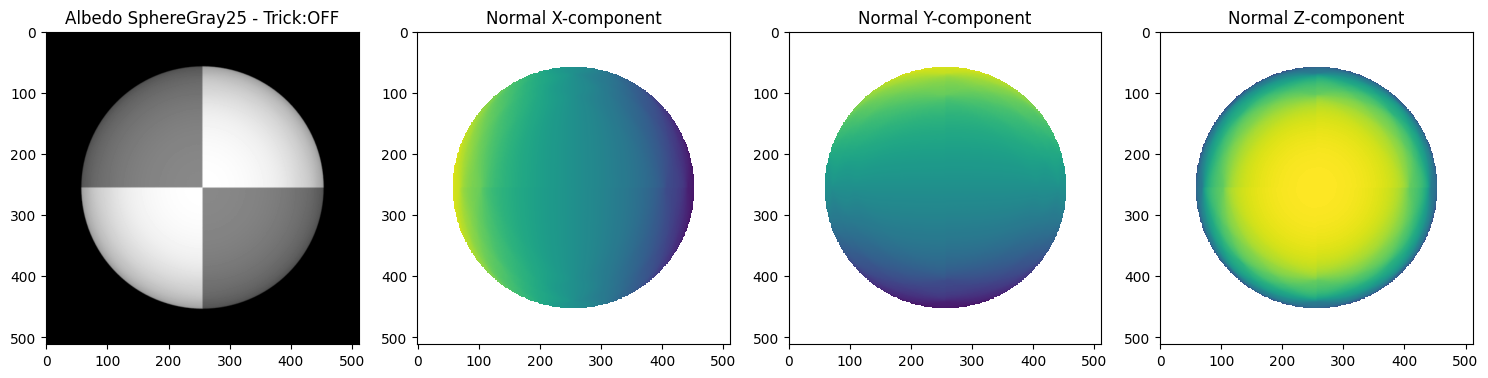

In [349]:
# Show results for SphereGray25
show_results(albedo_25, normal_25, num_imgs=25, trick="ON")
show_results(albedo_shadTrick_off_25, normal_shadTrick_off_25, num_imgs=25, trick="OFF")

The figures above show that when increasing the number of images to 25 the albedo get estimated more accurately. It is noticed that albedo is more uniform and homogeneous. This is clearly observed in the normal components as compared to the case of SpehereGray5 where the presence of shadows around the edges of the sphere are more noticeable. 

2. Only a small batch of images, 5 to be precisely, has been taken from the batch of the SphereGrey25. The results are shown below

In [ ]:
# load syn images
image_stack, scriptV = load_syn_images(image_dir='./images/photometrics_images/SphereGray25/', num_im=5)

# estimate_alb_nrm
albedo_25_batch, normal_25_batch = estimate_alb_nrm(image_stack, scriptV, True)
albedo_shadTrick_off_25_batch, normal_shadTrick_off_25_batch = estimate_alb_nrm(image_stack, scriptV, False)

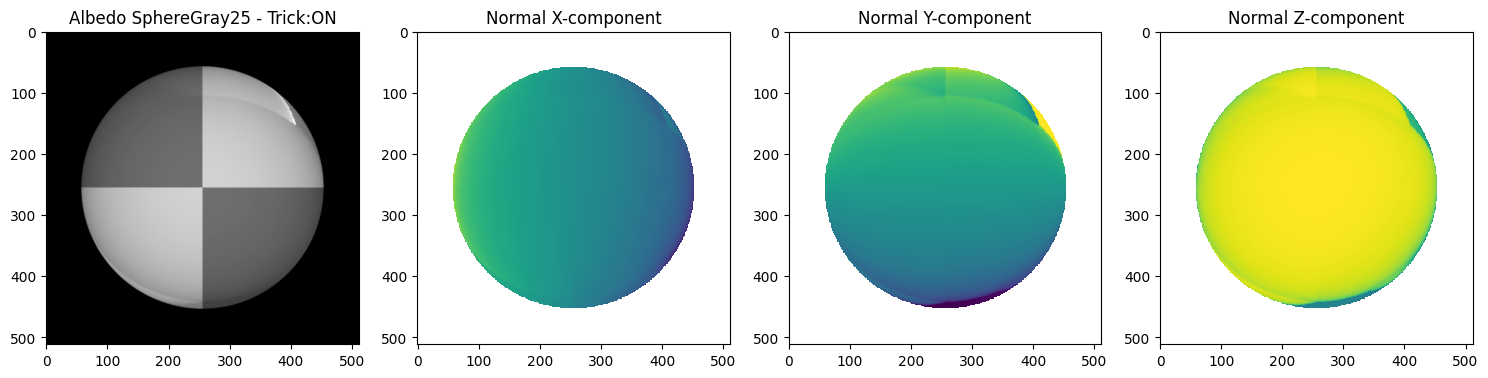

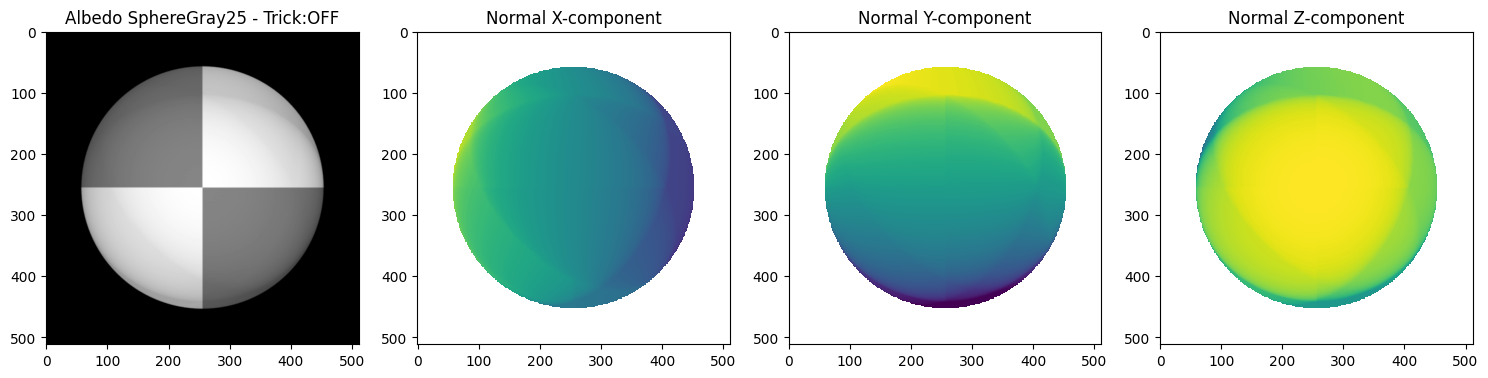

In [330]:
# Show results for SphereGray25
show_results(albedo_25_batch, normal_25_batch, num_imgs=25, trick="ON")
show_results(albedo_shadTrick_off_25_batch, normal_shadTrick_off_25_batch, num_imgs=25, trick="OFF")

The figures above are now displaying the albedo calculated for a small batch of images. As these selected group of images have lit up the sphere from certain and limited directions, the calculated albedo now displays an even more pronounced shadow effect around the sphere. This is noticeable in the case when the trick was set to False due to the direction of light for those 5-images misses some parts of the sphere.

From these two setups then it is observed as the number of images increase the albedo estimation increases its accuracy provided that the light sources cover homogeneously the scene. 

#### 3. What is the impact of shadows in photometric stereo? Explain the trick that is used in the text to deal with shadows. Remove that trick from your implementation and check your results. Is the trick necessary in the case of 5 images? how about 25 images?
$$
 \textbf{i}(x,y) = V\textbf{g}(x,y) \tag{1}
$$

$$
I \textbf{i}(x,y) = IV\textbf{g}(x,y) \tag{2}
$$
In prescence of shadows the intensity of the pixels of the image observed is reduced to zero. This makes the calculation of the radiosity **g** in (1) a hard task to acomplish. In order to mitigate this effect one can form a diagonal matrix $I$ using the values of the original image $i(x,y)$ and compute **g** in (2) so that the relevant elements of the matrix are zero at points that are in shadow.    

For SphereGray5 one can see that even though the estimated albedos seems similar, the surfaces normals are distinct. The edges shown in SphereGray5 when the shadow trick was off are due to the pixels in the shadow region. By using the trick both sides of eq2. are multiplied with the diagonal of the image-stack which zeros out the contribution of the shadows and thus creates a more homogenous albedo. 

### 4.2 Test of Integrability *(10 pts)*

Before we can reconstruct the surface height map, it is required to compute the partial derivatives $\frac{\delta f}{\delta x}$ and $\frac{\delta f}{\delta y}$ (or *p* and *q* in the algorithm). The partial derivatives also give us a chance to double check our computation, namely the test of *integrability*.

#### 4.2.1. Compute the partial derivatives (p and q in the algorithm) by filling in your code into **check_integrability()** (5 pts).

In [296]:
def check_integrability(normals):
    '''
    Check the surface gradient is acceptable
    INPUTS:
        - normals: normal image
    OUTPUTS:
        - p : df / dx
        - q : df / dy
        - SE : Squared Errors of the 2 second derivatives
    '''

    # initalization
    p = np.zeros(normals.shape[:2])     # (512, 512)
    q = np.zeros(normals.shape[:2])     # (512, 512)
    SE = np.zeros(normals.shape[:2])    # (512, 512)

    # ================
    # YOUR CODE HERE
    # ================
    # Compute p and q, where
    # p measures value of df / dx
    # q measures value of df / dy

    # extracting dimensions of normal
    N1 = normals[:, :, 0]
    N2 = normals[:, :, 1]
    N3 = normals[:, :, 2]
    
    # In the book: p = N1/N3 & q = N2/N3
    p = N1 / N3
    q = N2 / N3
    
    # change nan to 0
    p[p!=p] = 0
    q[q!=q] = 0

    # ================
    # YOUR CODE HERE
    # approximate second derivate by neighbor difference
    # and compute the Squared Errors SE of the 2 second derivatives SE
    # ================

    (_, dp_dy) = np.gradient(p) # gives two dimension
    (dq_dx, _) = np.gradient(q)

    SE = (dp_dy - dq_dx) ** 2
    
    return p, q, SE


SE: (512, 512) 1.265625000000002


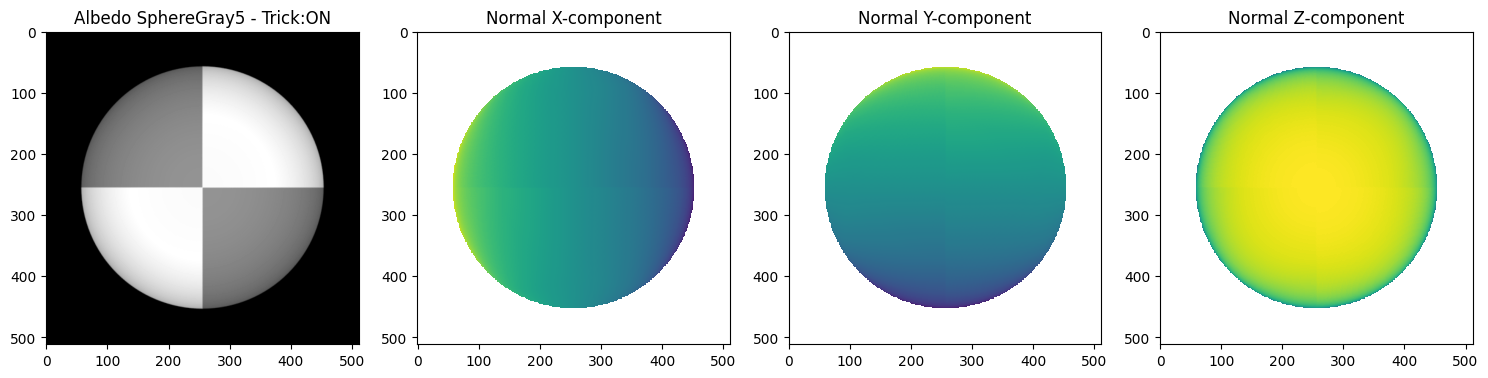

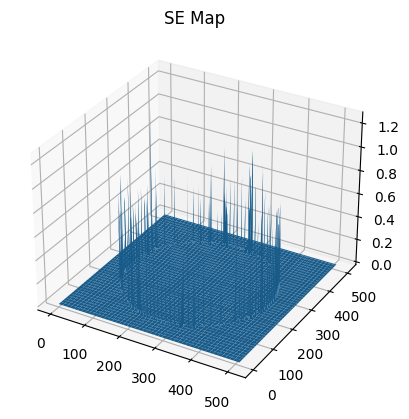

SE: (512, 512) 0.8796216800155299


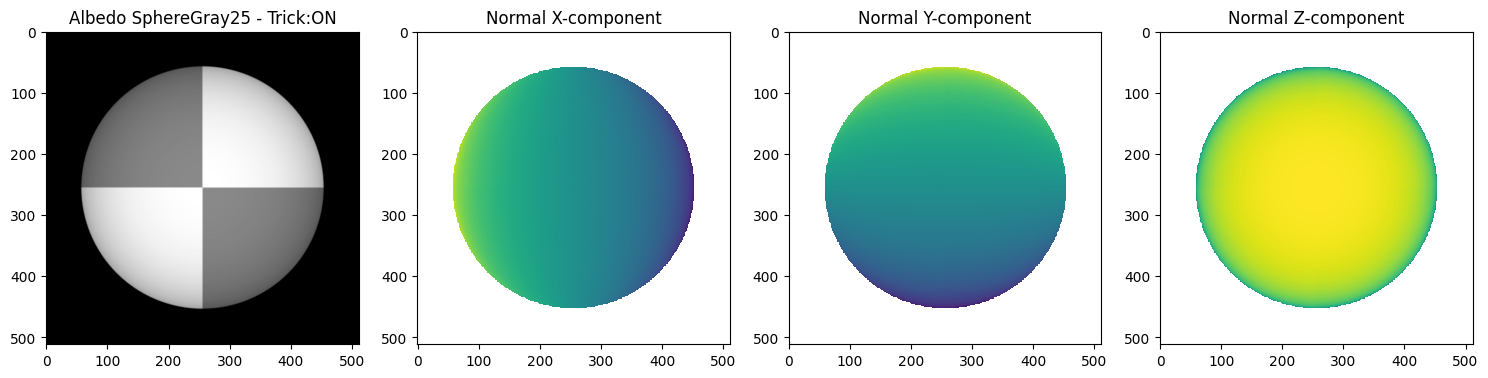

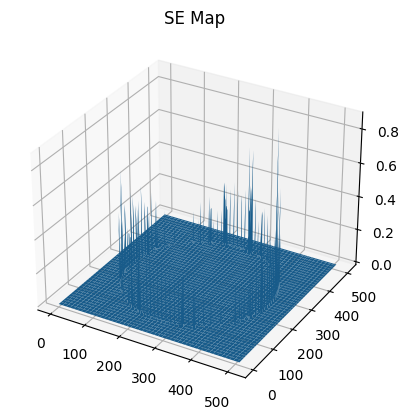

In [463]:
# Use the normals that you found in the previous question
p, q, SE = check_integrability(normal_5)
print('SE:', SE.shape, SE.max())
show_results(albedo_5, normal_5, SE=SE);

p, q, SE = check_integrability(normal_25)
print('SE:', SE.shape, SE.max())
show_results(albedo_25, normal_25, SE=SE, num_imgs=25);

#### 4.2.2. Second derivatives (5 pts)

Implement and compute the second derivatives according to the algorithm and perform the test of integrability by choosing a reasonable threshold. What could be the reasons for the errors? How does the test perform with different numbers of images used in the reconstruction process in 4.1?

The 

In [460]:
threshold = 0.05

normals = [normal_5, normal_25]
for i in range(len(normals)):
    p, q, SE = check_integrability(normals[i])
    print(f'SE_{5 ** (i+1)}:', SE.shape, SE.max())
    print(f'Number of outliers: {np.sum(SE > threshold)}\n')


SE_5: (512, 512) 1.265625000000002
Number of outliers: 2019

SE_25: (512, 512) 0.8796216800155299
Number of outliers: 1775



### 4.3 Shape by Integration *(15 pts)*  
To reconstruct the surface height map, we need to continuously integrate the partial derivatives over a path. However, as we are working with discrete structures, you will be simply summing their values.

The algorithm in the chapter presents a way to do the integration in column-major order, that is you start at the top-left corner and integrate along the first column, then go towards the right along each row. Yet, it is also noticed that it would be better to use many different paths and average so as to spread around the errors in the derivative estimates.

#### 4.3.1. Construct the surface height map (7 pts)

Construct the surface height map using column-major order as described in the algorithm, then implement row-major path integration. Your code should go in **construct_surface()**.

**Note**: By default, Numpy used row-major operations. So if you are unrolling an image to linearize the operation, you will end up with a row-major representation. Numpy can be configured to be column-major. Otherwise, if you are using the double for-loops without an unrolling operation, then this concern doesn’t apply.

**Hint**: You could further inspect the shape of the objects and normal directions by using **matplotlib.pyplot.quiver** function. You will have to choose appropriate sub-sampling ratios for proper illustration. You code goes to the **show_results()** function in the code cell above.

In [461]:
def construct_surface(p, q, path_type='column'):
    '''
    Construct the surface function represented as height_map
    INPUT:
       - p : measures value of df / dx
       - q : measures value of df / dy
       - path_type: type of path to construct height_map, either 'column',
         'row', or 'average'
    OUTPUT:
       - height_map: the reconstructed surface
    '''

    h, w = p.shape
    height_map = np.zeros([h, w])

    if path_type=='column':
        # ================
        # YOUR CODE HERE
        # ================
        # top left corner of height_map is zero
        # for each pixel in the left column of height_map
        #  height_value = previous_height_value + corresponding_q_value

        # for each row
        #   for each element of the row except for leftmost
        #       height_value = previous_height_value + corresponding_p_value
        
        for i in range(1,h):
            height_map[i,0] = height_map[i-1,0] + q[i,0]

        for i in range(h):
            for j in range(1, w):
                height_map[i,j] = height_map[i,j-1] + p[i,j]
                

    elif path_type=='row':
        # ================
        # YOUR CODE HERE
        # ================
        for i in range(1,w):
            height_map[0, i] = height_map[0, i-1] + p[0, i]

        for i in range(w):
            for j in range(1, h):
                height_map[j, i] = height_map[j-1, i] + q[j, i]

    elif path_type=='average':
        # ================
        # YOUR CODE HERE
        # ================
        height_map_col = np.zeros([h, w])
        for i in range(1,h):
            height_map_col[i,0] = height_map_col[i-1,0] + q[i,0]
        for i in range(h):
            for j in range(1, w):
                height_map_col[i,j] = height_map_col[i,j-1] + p[i,j]

        height_map_row = np.zeros([h, w])
        for i in range(1,w):
            height_map_row[0, i] = height_map_row[0, i-1] + p[0, i]
        for i in range(w):
            for j in range(1, h):
                height_map_row[j, i] = height_map_row[j-1, i] + q[j, i]

        height_map = (height_map_col + height_map_row)/2

    return height_map

#### Printing results for Albedo SphereGray 5 & 25 w/ Trick:ON

In [455]:
p_5, q_5, SE = check_integrability(normal_5)
print('p_5:', p_5.shape, 'q_5:', q_5.shape, q_5.max())

p_25, q_25, SE = check_integrability(normal_25)
print('p_25:', p_25.shape, 'q_25:', q_25.shape, q_25.max())

p_5: (512, 512) q_5: (512, 512) 2.2500000000000004
p_25: (512, 512) q_25: (512, 512) 1.7409550175959885


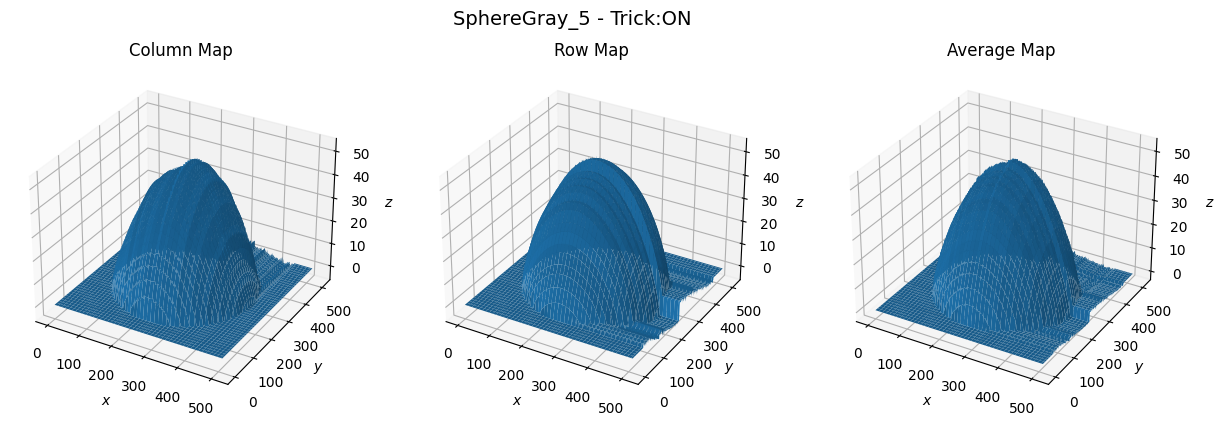

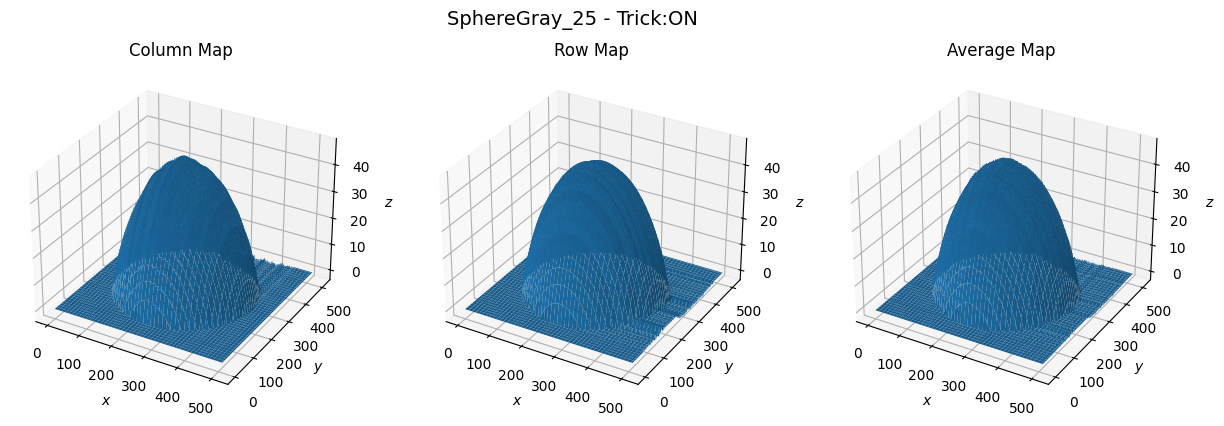

In [470]:
# Show all results
path_type = ['column', 'row', 'average']

# Maps for SphereGray5
height_map = []
for i in range(len(path_type)):
    height_map_ind = construct_surface(p_5, q_5, path_type=path_type[i])
    height_map.append(height_map_ind)

show_results(height_map=height_map, path_type=path_type, num_imgs=5)

# Maps for SphereGray25
height_map = []
for i in range(len(path_type)):
    height_map_ind = construct_surface(p_25, q_25, path_type=path_type[i])
    height_map.append(height_map_ind)

show_results(height_map=height_map, path_type=path_type, num_imgs=25)


#### 4.3.2. What are the differences in the results of the two paths? (4 pts)

When comparing the two paths for SphereGray5 one can see two distinctive cases. In the case of the column path, one can see that the lower half of the sphere along the y axis is higher as compared to the upper one. This is more evident in the case for the row path where the lower part of the sphere can be seen along the x axis. One can observe this more clearly on the top of the sphere where there is a discontinuity between these two parts that form the heigh map of the sphere.   

```python
# ===================================
# COLUMN-MAJOR PATH Pseudo Algorithm 
# ===================================

# top left corner of height_map is zero
        # for each pixel in the left column of height_map
        #  height_value = previous_height_value + corresponding_q_value

        # for each row
        #   for each element of the row except for leftmost
        #       height_value = previous_height_value + corresponding_p_value
```
![Alt text](image.png)


The reason for these discontinuities are due to how the the integration was computed. In the case for the column-path the integration for the rows was done from left to right taken into account only the partial derivative (**p**) along the horizontal direction. The partial derivative (**q**) of the surface w.r.t. to the vertical direction is not taken into account. This leads to the discontinuities between rows which are then observed along the x axis for the case of the colum-major path. Conversely this applies in opposite way for the row-major path.    

#### 4.3.3. Now, take the average of the results. (4 pts)

Do you see any improvement compared to when using only one path? Are the construction results different with different numbers of images being used?

Yes, the graph has greatly improved due to the averaging effect. One can see in the column path a stair case along the row axis, the same goes for the row path where this stair effect takes effect along the column axis. When we apply the averaging, we see the combined effect of these two and one can observe like a cross-shape in the top of the height map product of these two path being combined. However, in the average graph is evident that the shape has turned smooth and uniform. When comparing the SphereGray5 averaging with SphereGray25 once again we see improvements that are translated in the smoothness of the graph. This can be seen between the last column graph for the case of 5 and 25 images.

### 4.4 Experiments with different objects *(20 pts)*
In this part, you will try to run the photometric stereo algorithm in a various number of scenarios to see how well it can be generalized.

#### 4.4.1. Run the algorithm and show the results for the MonkeyGray model. *(5 pts)*

##### 1.a Complete the code below, run the algorithm and show the results

In [ ]:
def photometric_stereo(image_dir='./images/photometrics_images/MonkeyGray/'):

    # obtain many images in a fixed view under different illumination
    print('Loading images...\n')
    [image_stack, scriptV] = load_syn_images(image_dir)
    [h, w, n] = image_stack.shape
    print('Finish loading %d images.\n' % n)

    # compute the surface gradient from the stack of imgs and light source mat
    print('Computing surface albedo and normal map...\n')
    # YOUR CODE HERE


    # integrability check: is (dp / dy  -  dq / dx) ^ 2 small everywhere?
    print('Integrability checking\n')
    # YOUR CODE HERE

    # threshold = XXX;
    print('Number of outliers: %d\n' % np.sum(SE > threshold))
    SE[SE <= threshold] = float('nan') # for good visualization

    # compute the surface height
    # YOUR CODE HERE

    # show results
    # YOUR CODE HERE

# Use the function
image_dir = 'images/photometrics_images/MonkeyGray/'
photometric_stereo(image_dir)

##### 1.b Explain errors

The albedo results of the monkey may comprise more albedo errors than in case of the sphere. Observe and describe the errors: Experiment with different cases and observe the errors that arise. (You don't need to calculate and give numerical errors.)

What could be the reason for those errors? You may want to experiment with different numbers of images as you did in Question 1 to see the effects.

*Write your answer here*

##### 1.c What do you think could help solving these errors?

*Write your answer here*

#### 4.4.2. Three-channel images. *(5 pts)*

So far, we have assumed that albedos are 1-channel grayscale images and that input images are also 1-channel. To work with 3-channel images, a simple solution is to split the input image into separate channels and treat them individually. Yet, that would generate a small problem while constructing the surface normal map if a pixel value in a channel is zero.


##### 2.a Update the implementation to work for 3-channel RGB inputs and test it with 2 models SphereColor and MonkeyColor.


In [ ]:
# YOUR CODE HERE


##### 2.b Explain your changes and show your results.

*Write your answer here*

##### 2.c Observe the problem in the constructed surface normal map and height map. Explain why a zero pixel could be a problem and propose a way to overcome that.

*Write your answer here*


#### 4.4.3. Real world dataset A *(5 pts)*   

Now, it's the time to try the algorithm on real-world datasets. For that purpose, we are going the use the Yale Face Database and the Apple dataset.

First the Yale Face Database.

##### 3.a Run the algorithm for the Yale Face images: [Yale Face Database](http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html). The Yale face data is included in the lab material.

##### 3.b Observe and discuss the results for different integration paths.

An answer box can be found below the code cells.

**Hint**: For proper computation of albedo and surface normal, you may want to suspend the shadow trick described in the text, and use the original formula:
$$i = Vg(x,y)$$

In [ ]:
## help functions for loading Yale Face and Apple images

def load_face_images(image_dir='./images/photometrics_images/yaleB02/'):
    num_images = 64
    filename = os.path.join(image_dir, 'yaleB02_P00_Ambient.pgm')
    ambient_image = cv2.imread(filename, -1)
    h, w = ambient_image.shape

    # get list of all other image files
    import glob
    d = glob.glob(os.path.join(image_dir, 'yaleB02_P00A*.pgm'))
    import random
    d = random.sample(d, num_images)
    filenames = [os.path.basename(x) for x in d]

    ang = np.zeros([2, num_images])
    image_stack = np.zeros([h, w, num_images])

    for j in range(num_images):
        ang[0,j], ang[1,j] = np.double(filenames[j][12:16]), np.double(filenames[j][17:20])
        image_stack[...,j] = cv2.imread(os.path.join(image_dir, filenames[j]), -1) - ambient_image


    x = np.cos(np.pi*ang[1,:]/180) * np.cos(np.pi*ang[0,:]/180)
    y = np.cos(np.pi*ang[1,:]/180) * np.sin(np.pi*ang[0,:]/180)
    z = np.sin(np.pi*ang[1,:]/180)
    scriptV = np.array([y,z,x]).transpose(1,0)

    image_stack = np.double(image_stack)
    image_stack[image_stack<0] = 0
    min_val = np.min(image_stack)
    max_val = np.max(image_stack)
    image_stack = (image_stack - min_val) / (max_val - min_val) if max_val!=min_val else np.zeros(image_stack.shape)  # avoid fail when image_stack==0

    return image_stack, scriptV


def load_apple_images(image_dir='./images/photometrics_images/Apple'):
    num_images = 99
    filename = os.path.join(image_dir, 'I_0000.png')
    try_image = cv2.imread(filename, -1)
    h, w = try_image[:,:,0].shape

    # get list of all other image files
    import glob
    d = glob.glob(os.path.join(image_dir, 'I_00*.png'))
    import random
    d = random.sample(d, num_images)
    filenames = [os.path.basename(x) for x in d]
    filenames_idx = []
    for i in filenames:
        filenames_idx.append(int(i.split('_')[1].split('.')[0]))

    ang = np.zeros([2, num_images])
    image_stack = np.zeros([h, w, num_images])

    for j in range(num_images):
        image_stack[...,j] = cv2.imread(os.path.join(image_dir, filenames[j]), -1)[:,:,0]

    with open('./images/photometrics_images/Apple/light_directions_refined.txt') as file:
        lines = [line.split() for line in file]
        x, y, z = [], [], []
        for idx in filenames_idx:
            x.append(float(lines[idx][0]))
            y.append(float(lines[idx][1]))
            z.append(float(lines[idx][2]))

    scriptV = np.array([y,z,x]).transpose(1,0)

    image_stack = np.double(image_stack)
    image_stack[image_stack<0] = 0
    min_val = np.min(image_stack)
    max_val = np.max(image_stack)
    image_stack = (image_stack - min_val) / (max_val - min_val) if max_val!=min_val else np.zeros(image_stack.shape)  # avoid fail when image_stack==0

    return image_stack, scriptV




In [ ]:
'''
For each of Face and Apple, you should:
- Load the images
- Compute the surface albedo and normal map
- Run the integrability check
- Find the number of outliers
- Compute the surface albedo and normal mape surface height
- Show the results
'''

## Face
def photometric_stereo_face(image_dir='./images/photometrics_images/yaleB02/', path_type='average'):
    [image_stack, scriptV] = load_face_images(image_dir)
    [h, w, n] = image_stack.shape
    print('Finish loading %d images.\n' % n)
    # Compute the surface albedo and normal map
    print('Computing surface albedo and normal map...\n')
    # YOUR CODE HERE
    # albedo, normals = ...

    # integrability check: is (dp / dy  -  dq / dx) ^ 2 small everywhere?
    print('Integrability checking')
    # YOUR CODE HERE
    # p, q, SE = ...

    # YOUR CODE HERE
    # threshold = XXX;
    print('Number of outliers: %d\n' % np.sum(SE > threshold))
    SE[SE <= threshold] = float('nan') # for good visualization

    # YOUR CODE HERE
    # compute the surface height
    # height_map = ...

    # show results
    # YOUR CODE HERE

## Apple
def photometric_stereo_apple(image_dir='./images/photometrics_images/Apple/', path_type='average'):
    [image_stack, scriptV] = load_apple_images(image_dir)
    [h, w, n] = image_stack.shape
    print('Finish loading %d images.\n' % n)
    # Compute the surface albedo and normal map
    print('Computing surface albedo and normal map...\n')
    # YOUR CODE HERE
    # albedo, normals = ...

    # integrability check: is (dp / dy  -  dq / dx) ^ 2 small everywhere?
    print('Integrability checking')
    # YOUR CODE HERE
    # p, q, SE = ...

    # YOUR CODE HERE
    # threshold = XXX;
    print('Number of outliers: %d\n' % np.sum(SE > threshold))
    SE[SE <= threshold] = float('nan') # for good visualization

    # YOUR CODE HERE
    # compute the surface height
    # height_map = ...

    # show results
    # YOUR CODE HERE

*Write your answer here*

##### 3.c Discuss how the images violate the assumptions of the shape-from-shading methods. Remember to include specific input images to illustrate your points.


*Write your answer here*

##### 3.d How would the results improve when the problematic images are all removed? Try it out and show the results in your notebook.

*Write your answer here*

#### 4.4.4. Real world dataset B (5 pts).  

And finally, the Apple dataset. Show your results on real-world 3-channel RGB inputs, contained in the "Apple" folder, taken from [this dataset](http://vision.ucsd.edu/~nalldrin/research/cvpr08/datasets/) from the University of California San Diego.   

Observe and discuss the results for different integration paths. You may find difficulties in using this non-sythetic dataset. Try if filtering may help.

In [ ]:
# YOUR CODE HERE

*Write your answers here*

# X Individual Contribution Report *(Mandatory)*

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.


Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

( Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing: )

# -End of Notebook-